# Load wine data for analysis

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
# print df_wine.tail(5)

from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print('Class labels', np.unique(df_wine['Class label']))

# Normalize data and compare Std vs MinMax Normalization

In [2]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_minmax = mms.fit_transform(X_train)
X_test_minmax = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_stnd = ss.fit_transform(X_train)
X_test_stnd = ss.fit_transform(X_test)

print "X,\tX_minmax,\tX_stnd", X_test.shape
for xi, xi_minmax, xi_stnd in zip(X_test[0:5,0], X_test_minmax[0:5,0], X_test_stnd[0:5,0]):
    print xi, ",", xi_minmax,",", xi_stnd

X,	X_minmax,	X_stnd (54, 13)
13.74 , 0.728494623656 , 0.838394340687
12.79 , 0.47311827957 , -0.300933597783
12.37 , 0.360215053763 , -0.804636475843
13.56 , 0.680107526882 , 0.622521678661
13.05 , 0.543010752688 , 0.0108824695877


# Logistic Regression with L1 Regularization

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Logistic regression with L1 regularization
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_stnd, y_train)

# This is a multi class (3 class) classification.
print "- Num classes to classify in this dataset:", np.unique(y_train)
print '- Training accuracy with L1 regularization:', lr.score(X_train_stnd, y_train)
print '- Test accuracy with L1 regularization:', lr.score(X_test_stnd, y_test)
print "- Expected mean value of y when all X=0", lr.intercept_

# The weight array that we accessed via the lr.coef_ attribute contains three
# rows of weight coefficients, one weight vector for each class.
print "- weight array for class0: \n", lr.coef_[0] 
print "- weight array for class1: \n", lr.coef_[1] 
print "- weight array for class2: \n", lr.coef_[2] 

- Num classes to classify in this dataset: [1 2 3]
- Training accuracy with L1 regularization: 0.983870967742
- Test accuracy with L1 regularization: 0.981481481481
- Expected mean value of y when all X=0 [-0.38379867 -0.15807663 -0.70043961]
- weight array for class0: 
[ 0.28006322  0.          0.         -0.02792109  0.          0.
  0.70993391  0.          0.          0.          0.          0.
  1.23655431]
- weight array for class1: 
[-0.64398431 -0.06877076 -0.05720253  0.          0.          0.          0.
  0.          0.         -0.92670047  0.06019519  0.         -0.37109972]
- weight array for class2: 
[ 0.          0.06155259  0.          0.          0.          0.
 -0.63543996  0.          0.          0.49779772 -0.35835983 -0.57168859
  0.        ]


# Plot weight coefficients of different features for different regularization strengths

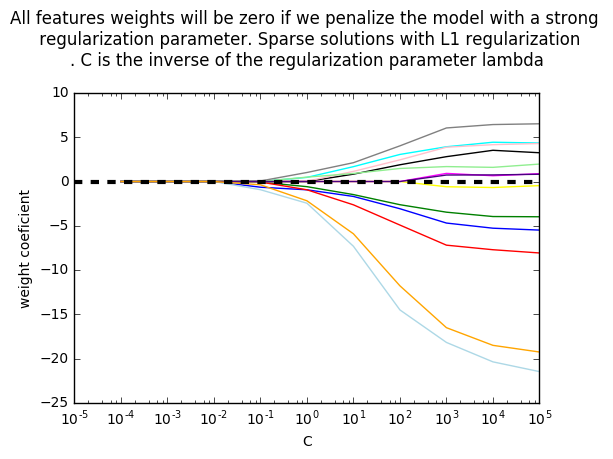

In [4]:
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

ax = plt.subplot(111)

weights, params = [], []
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty='l1', C=10**c)
    lr.fit(X_train_stnd, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

#plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('weight coeficient')
plt.xscale('log')
plt.title('All features weights will be zero if we penalize the model with a strong \n regularization parameter. Sparse solutions with L1 regularization\n. C is the inverse of the regularization parameter lambda\n')
plt.show()

# Use Sequential Backward Selection with KNN

/Users/surthi/Envs/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


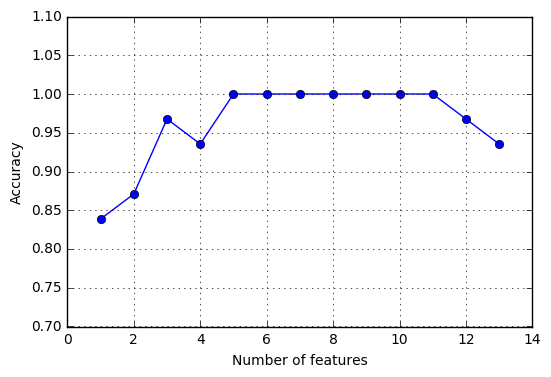

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')
[0, 1, 3, 10, 12]


In [5]:
% run 'sbs.ipynb'

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# train sbs with knn
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_stnd, y_train)

# plot the graph
k_features = [len(k) for k in sbs.subsets_]
plt.plot(k_features, sbs.scores_, marker='o')
plt.grid()
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

# Let's see which 5 features gave the max performance..
k5 = list(sbs.subsets_[8])
print df_wine.columns[1:][k5]
print k5

In [6]:
# Compare FullSet VS 5 features suggested by SBS ran in above section..

knn.fit(X_train_stnd, y_train)
print "Score with all features on taining set: ", knn.score(X_train_stnd, y_train)
print "Score with all features on testing set: ", knn.score(X_test_stnd, y_test)

knn.fit(X_train_stnd[:, k5], y_train)
print "Score with 5 features on taining set: ", knn.score(X_train_stnd[:, k5], y_train)
print "Score with 5 features on testing set: ", knn.score(X_test_stnd[:, k5], y_test)

Score with all features on taining set:  0.983870967742
Score with all features on testing set:  0.944444444444
Score with 5 features on taining set:  0.959677419355
Score with 5 features on testing set:  0.925925925926


We can tell overfitting from the small gap between test and training accuracy.

In the previous sections, we learned:
- how to use L1 regularization to zero out irrelevant features via logistic regression
- use the SBS algorithm for feature selection. 
- Another useful approach to select relevant features from a dataset is to use a random forest. Using a random forest, we can measure feature importance as the averaged impurity decrease computed from all decision trees in the forest without making any assumptions whether our data is linearly separable or not. 

# Next.. Calculate Feature Importance

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train) # no need of normalized input to forest
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = df_wine.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


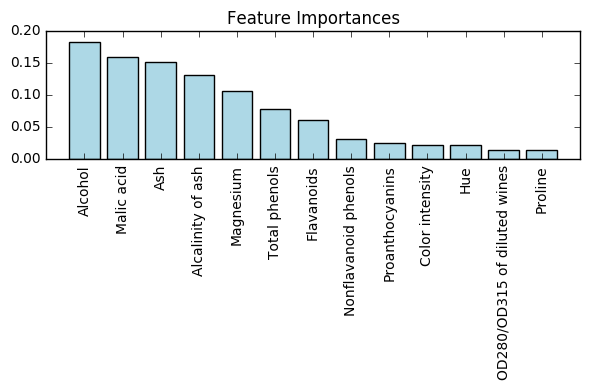

In [17]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [25]:
# Transform X_train using forest classifier trained above
from sklearn.feature_selection import SelectFromModel
X_selected = SelectFromModel(forest, threshold=0.15, prefit=True).transform(X_train)
X_selected.shape

(124, 3)